In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

In [13]:
# Explore

In [14]:
#plt.rc sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [17]:
df = wrangle_grades()

In [18]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [22]:
## Continuous and Continious

In [23]:
## Continuous and Categorical

In [24]:
## Categorical and Categorical

In [25]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [26]:
## Continuous and Continious

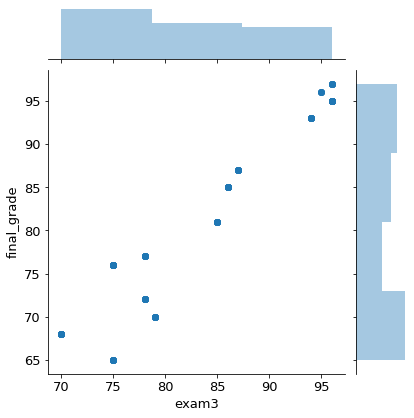

In [29]:
sns.jointplot(x='exam3',y='final_grade', data= train)

Thoughts: Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

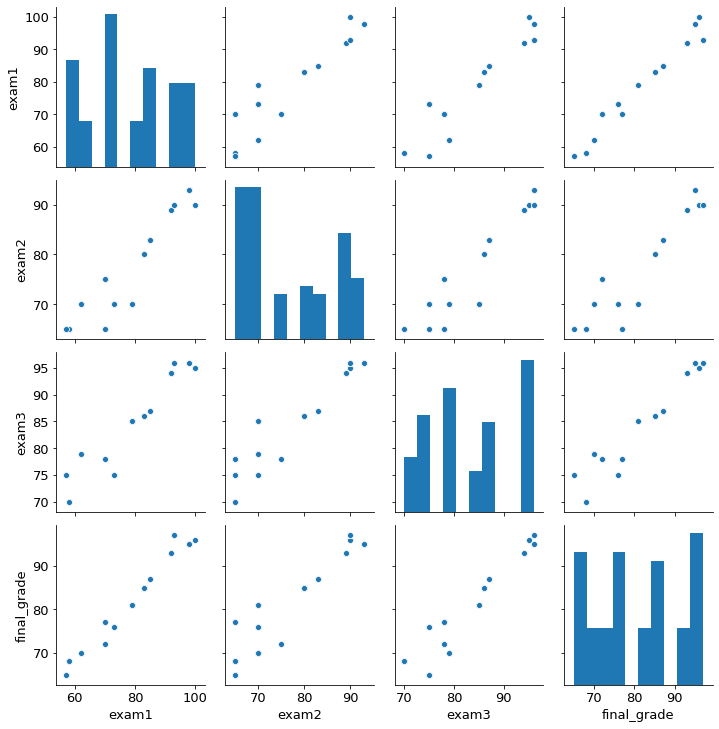

In [30]:
sns.pairplot(train)

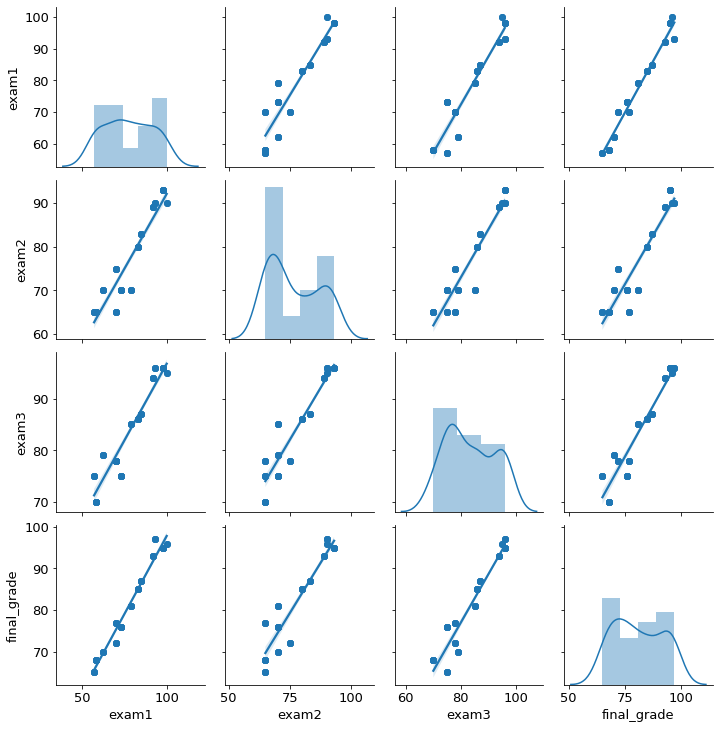

In [35]:
g = sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [36]:
df.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933423,0.951743,0.983944
exam2,0.933423,1.000000,0.938773,0.926679
exam3,0.951743,0.938773,1.000000,0.959412
final_grade,0.983944,0.926679,0.959412,1.000000


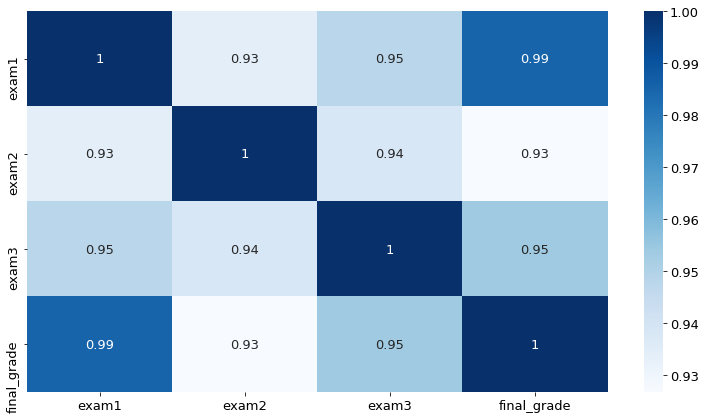

In [37]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:
    
- exam 2 has the least correlation with final grade

- exam 1 has the highest correlation with final grade

Questions:

- Why does exam 2 have a lower correlation?
    - students are slacking midsemester
    
    - the material covered on the final isn't the         same as what is covered in exam 2
    
    - the material covered midsemester is harder

In [38]:
# Continuous and Categorical

In [39]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


In [45]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0,70,80,90,105], labels=['D','C','B','A'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz types for continuous x categorical:
    
- boxplot
- bar chart
- violin
- swarmplot


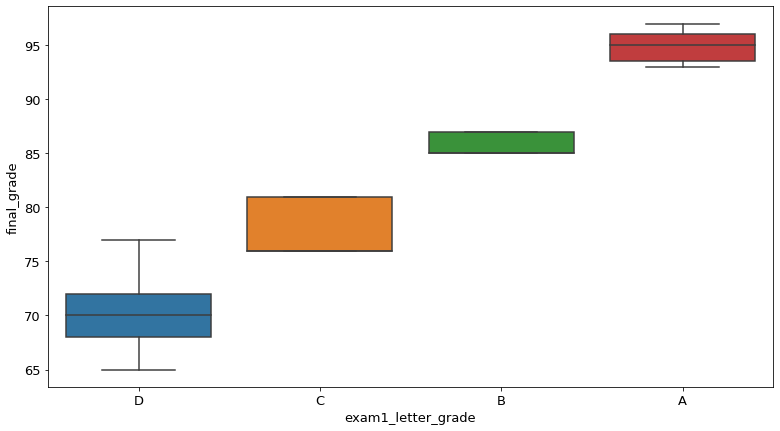

In [48]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:
    
- students with Ds not only have the lowest grade, but also the most variation in grades

    - maybe this is due to different study habits or workflows?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

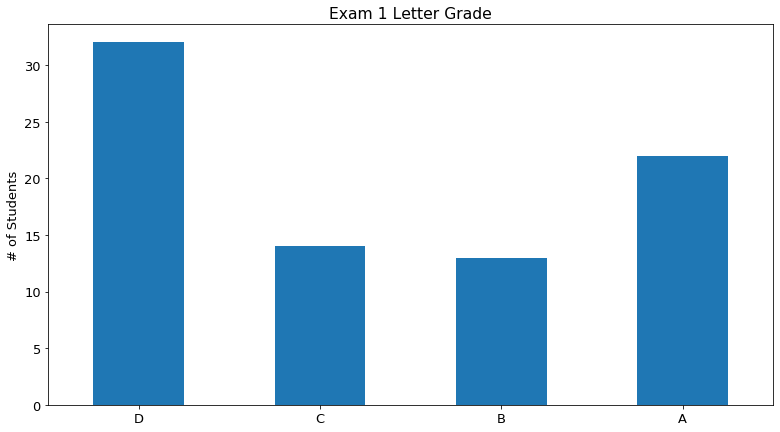

In [56]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grade')
plt.xticks(rotation=0)

Takeaway: there's not significantly fewer observations in the B category, maybe this subgroup is ripe for future research

In [67]:
# make a fake category
np.random.seed(125)
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,Two
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,Two
75,58,65,70,68,D,Two


(0, 100)

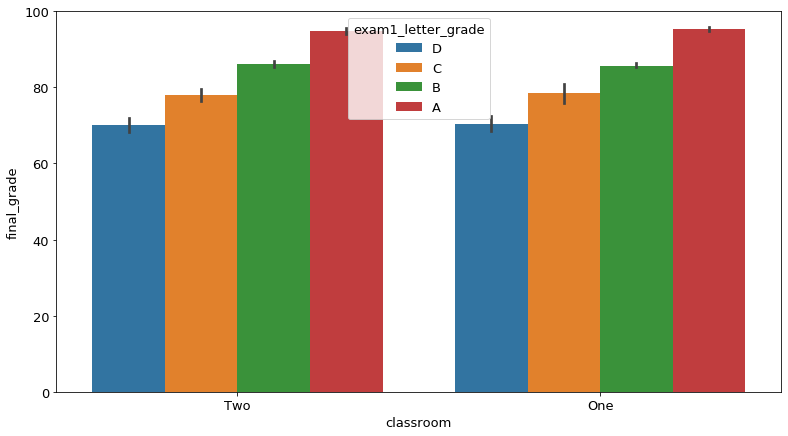

In [68]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0,100)

Takeaway: the distribution of grades in classroom one and two are about the same.
    
Classroom doesn't impact final grade? Let's run a hypothesis test to check.

Null: There is no difference in final grade between classroom one and classroom two
Alternative: There is a signficant difference in final grade between classroom one and classroom two   

In [69]:
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False,
)

Ttest_indResult(statistic=0.14824815473064099, pvalue=0.8825332594672417)

With a p-value of .025, we reject the null hypothesis that there is no difference in final grade between classroom one and classrom two.

p-value: P(data due to chance | given that null is true)

- takeaways
    - visualize, don't just test
    - statistical significance != business signficance

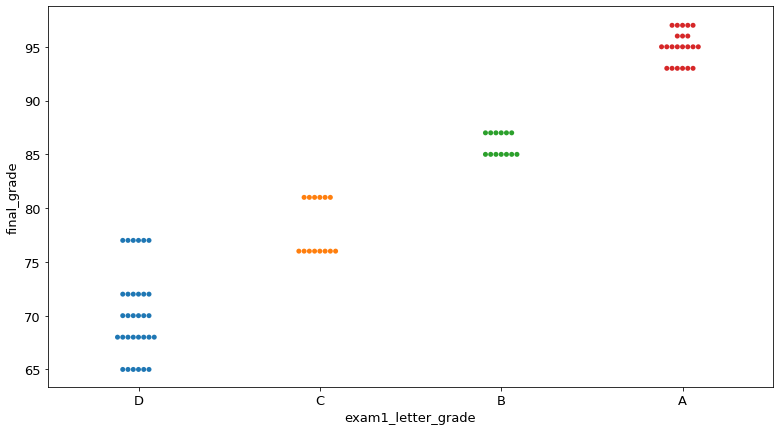

In [70]:
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

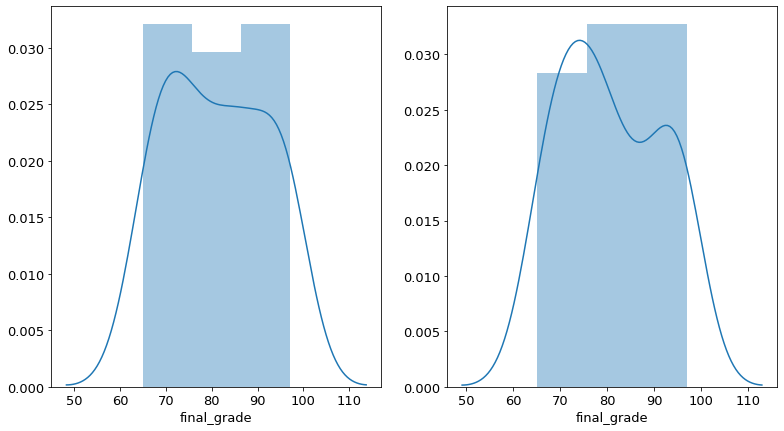

In [75]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

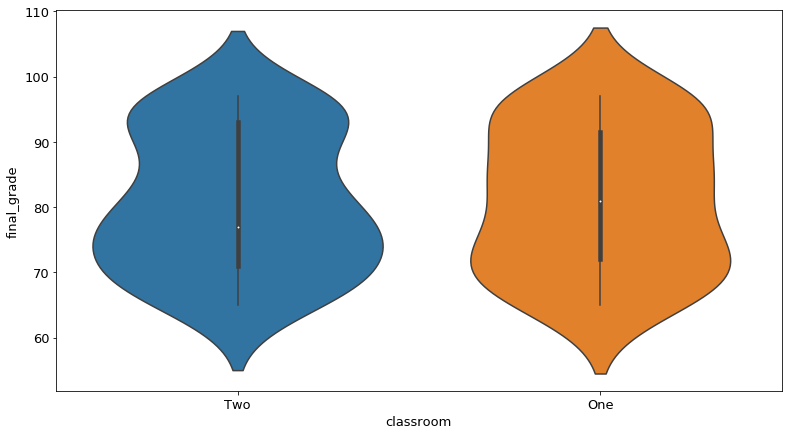

In [74]:
sns.violinplot(data=train, y='final_grade'
               , x='classroom')

In [78]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
D,19.8%,19.8%
C,4.9%,12.3%
B,9.9%,6.2%
A,12.3%,14.8%


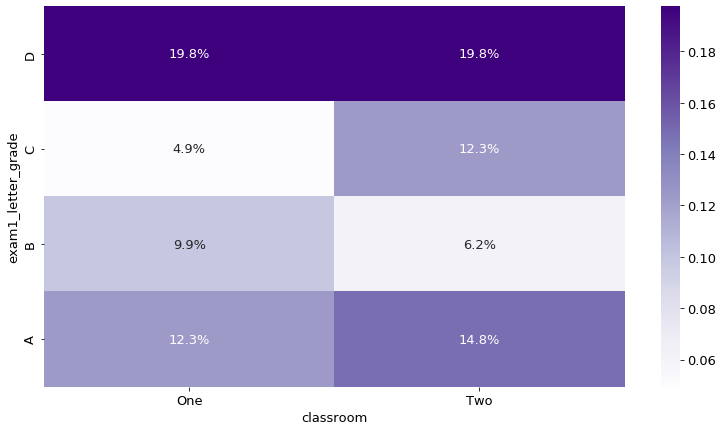

In [81]:
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')